# AFL2 Data Mining - Josephine Young (0706022110044)

# Data Cleaning and preparation:
1. Missing values
2. date_time format
3. categorical feature that needs to be encoded into numerical format


In [33]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [34]:
# Read CSV
url = 'customer_analysis.csv'
df = pd.read_csv(url, sep = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [36]:
#Missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [37]:
df = df.dropna(subset=['Income'])

In [38]:
missing_values_after = df.isnull().sum()
print(missing_values_after)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [39]:
df.duplicated().sum()

0

In [40]:
# Date_time conversion format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [41]:
# Encode categorical into numerical
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Feature Engineering (Create/Remove feature from available data):
1. Age Extraction: We'll unveil the age of each customer by deciphering their birth year from the "Year_Birth."
2. Spending Power: Introducing "Spent," a dynamic feature showcasing the total expenditure across various categories over the past two years.
3. Household Living Arrangement: craft "Living_With" from "Marital_Status," revealing the living arrangements of  valued couples.
4. Family Dynamics: "Children" will emerge, quantifying the number of children in a household, encompassing both the young ones and teenagers.
5. Family Unity: "Family_Size" will take shape, providing insights into the size and structure of each household.
6. Parental Status: "Is_Parent" will be born, simplifying the journey of parenthood for our customers.
7. Educational Evolution: "Education" will undergo a transformation, restructured into three distinct categories for clarity.
8. Farewell to Redundancy: We'll bid adieu to redundant features, streamlining our dataset for a sleek and insightful analysis.

In [42]:
# Age extraction
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Spending power
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Household living arrangement
df['Living_With'] = df['Marital_Status'].replace({'Single': 'Alone','Alone': 'Alone','Married': 'Spouse','Together': 'Spouse','Divorced': 'Alone','Widow': 'Alone','Absurd': 'Other','YOLO': 'Alone'})

# Family dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']

# Family unity
df['Family_Size'] = 1 + df['Children']

# Parental status
df['Is_Parent'] = (df['Children'] > 0).astype(int)

#Edu evolution
df['Education'] = df['Education'].replace({'Basic':'Undergraduate','2nd Cycle':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

#Farewell to redundancy
df = df.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

#Not necessary feature
df = df.drop(["Marital_Status", "Kidhome", "Teenhome", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)
df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1617,4,0,1,0
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,27,4,2,3,1
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,776,5,0,1,0
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,53,5,1,2,1
4,4,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,422,3,1,2,1


In [43]:
df.describe()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.393953,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.064079,0.013538,0.009477,0.150271,54.179603,607.075361,3.726083,0.947202,1.947202,0.714350
std,1.124141,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,1.077731,0.749062,0.749062,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,46.000000,69.000000,3.000000,0.000000,1.000000,0.000000
50%,2.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,53.000000,396.500000,4.000000,1.000000,2.000000,1.000000
75%,3.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,1048.000000,5.000000,1.000000,2.000000,1.000000
max,4.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,130.000000,2525.000000,7.000000,3.000000,4.000000,1.000000


# Data Preparation
1. Label Encoding: Translate categorical features into numbers so that your algorithms can work their magic.
2. Scaling: Using the standard scaler to put all features on the same playing field, making it easier for your algorithms to do their thing.
3. Dimensionality Reduction: Creating a smaller, more manageable subset of data, simplifying the complexity for smoother analysis. (may or may not be used)


In [44]:
# Label Encoding
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Living_With'] = LabelEncoder().fit_transform(df['Living_With'])

display(df)

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1617,4,0,1,0
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,27,4,2,3,1
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,776,5,0,1,0
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,53,5,1,2,1
4,4,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,422,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,46,709,43,182,42,118,247,2,...,0,0,0,0,56,1341,3,1,2,1
2236,4,64014.0,56,406,0,30,0,0,8,7,...,1,0,0,0,77,444,5,3,4,1
2237,2,56981.0,91,908,48,217,32,12,24,1,...,0,0,0,0,42,1241,2,0,1,0
2238,3,69245.0,8,428,30,214,80,30,61,2,...,0,0,0,0,67,843,5,1,2,1


In [45]:
# Scaling
scaler = StandardScaler()
scaledDt = scaler.fit_transform(df)
scaledDf = pd.DataFrame(scaledDt, columns=df.columns)
scaledDf

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.350527,0.234063,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,...,-0.261661,-0.117148,-0.097812,2.377952,0.986443,1.675488,0.254218,-1.264803,-1.264803,-1.581389
1,-0.350527,-0.234559,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,...,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,-0.962358,0.254218,1.405806,1.405806,0.632356
2,-0.350527,0.769478,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,...,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,0.280250,1.182303,-1.264803,-1.264803,-1.581389
3,-0.350527,-1.017239,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,...,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,-0.919224,1.182303,0.070501,0.070501,0.632356
4,1.429011,0.240221,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,...,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-0.307044,-0.673866,0.070501,0.070501,0.632356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.350527,0.356642,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,...,-0.261661,-0.117148,-0.097812,-0.420530,0.151917,1.217598,-0.673866,0.070501,0.070501,0.632356
2212,1.429011,0.467539,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,...,3.821732,-0.117148,-0.097812,-0.420530,1.904422,-0.270546,1.182303,2.741110,2.741110,0.632356
2213,-0.350527,0.188091,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,...,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,1.051696,-1.601951,-1.264803,-1.264803,-1.581389
2214,0.539242,0.675388,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,...,-0.261661,-0.117148,-0.097812,-0.420530,1.069896,0.391404,1.182303,0.070501,0.070501,0.632356


In [46]:
scaled_df = StandardScaler().fit_transform(df)
display(scaled_df)

array([[-0.35052725,  0.2340627 ,  0.31053212, ..., -1.26480327,
        -1.26480327, -1.5813886 ],
       [-0.35052725, -0.23455948, -0.38050944, ...,  1.40580564,
         1.40580564,  0.63235564],
       [-0.35052725,  0.76947764, -0.79513438, ..., -1.26480327,
        -1.26480327, -1.5813886 ],
       ...,
       [-0.35052725,  0.18809052,  1.4507507 , ..., -1.26480327,
        -1.26480327, -1.5813886 ],
       [ 0.53924181,  0.67538765, -1.41707178, ...,  0.07050118,
         0.07050118,  0.63235564],
       [ 1.42901088,  0.02470453, -0.31140528, ...,  1.40580564,
         1.40580564,  0.63235564]])

In [47]:
# Dimensional reduction
pca = PCA(n_components=3)
pca.fit(scaledDf)
pca_df = pd.DataFrame(pca.fit_transform(scaledDf), columns=(['PC1','PC2','PC3']))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2216.0,1.418841e-16,2.857174,-5.518876,-2.472894,-0.959101,2.156056,8.666253
PC2,2216.0,-4.308627e-18,1.549171,-3.879377,-1.128623,-0.148823,1.010014,5.679942
PC3,2216.0,-2.985979e-17,1.377927,-3.523980,-0.719316,-0.072940,0.399625,8.914580


# Clustering
key milestones:
1. Elbow Method: We'll pinpoint the ideal number of clusters.
2. Agglomerative Clustering: The heart of our clustering journey.
3. Scatter Plot Revelations: We'll unveil the cluster patterns using scatter plots. 


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


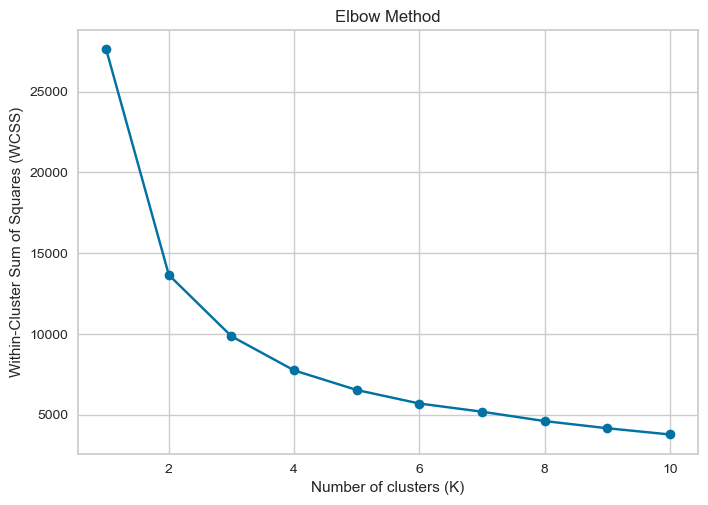

In [48]:
#Elbow method
wcss = []
# check the inertia for each K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=5, max_iter=500, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [49]:
# using kneelocator to find the elbow/knee
kneed = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print("The best k for you model is", kneed.elbow)

The best k for you model is 3


In [50]:
# Agglomerative clustering
pca = PCA(n_components=2)

# Agglomerative Clustering model with 4 clusters
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')

# Fit the model on PCA-transformed data
labels = model.fit_predict(pca_df)

# Add the cluster labels to both DataFrames
df['Cluster'] = labels
pca_df['Cluster'] = labels

display(df)
display(pca_df)

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Cluster
0,2,58138.0,58,635,88,546,172,88,88,3,...,0,0,1,66,1617,4,0,1,0,1
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,69,27,4,2,3,1,2
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,58,776,5,0,1,0,1
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,39,53,5,1,2,1,2
4,4,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,42,422,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,46,709,43,182,42,118,247,2,...,0,0,0,56,1341,3,1,2,1,0
2236,4,64014.0,56,406,0,30,0,0,8,7,...,0,0,0,77,444,5,3,4,1,0
2237,2,56981.0,91,908,48,217,32,12,24,1,...,0,0,0,42,1241,2,0,1,0,1
2238,3,69245.0,8,428,30,214,80,30,61,2,...,0,0,0,67,843,5,1,2,1,0


,PC1,PC2,PC3,Cluster
0,4.612793,0.052967,-0.621084,1
1,-2.953203,0.143574,-0.134427,2
2,2.245859,-1.043111,-0.933873,1
3,-2.467568,-1.199888,0.172552,2
4,-0.524362,0.745691,-0.832045,0
...,...,...,...,...
2211,2.101681,1.538576,-1.689369,0
2212,-1.814848,4.530021,0.606024,0
2213,2.374354,-0.623468,1.155233,1
2214,1.320422,1.066946,-1.126338,0


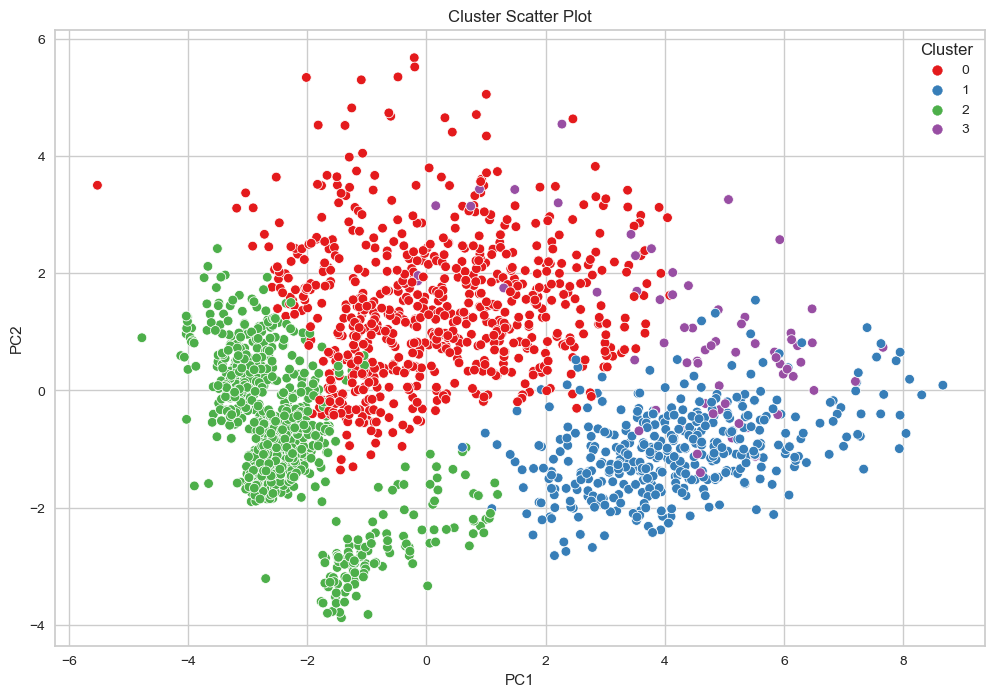

In [51]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue="Cluster", palette='Set1')
plt.title("Cluster Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster", loc="best")
plt.show()

# Visualization 
1. you may use scatterplots, swarmplot, boxenplot to evaluate your clustering models
2. draw distribution of cluster chart
3. profiling between income and spending cluster


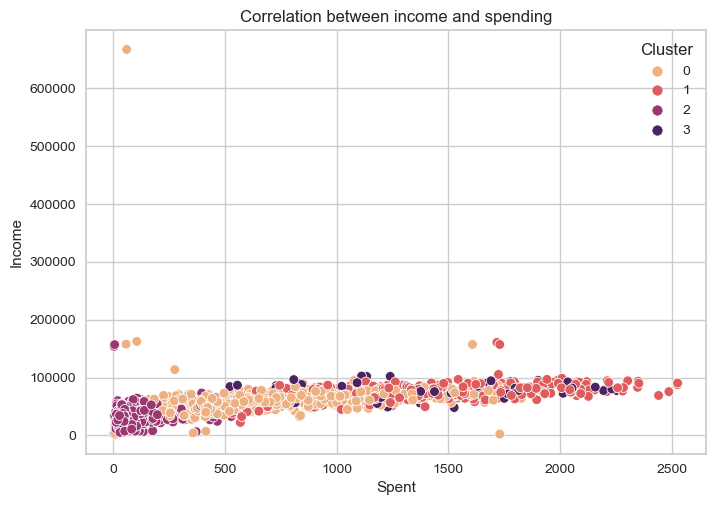

In [52]:
#Visualization using scatterplot
sns.scatterplot(data=df, x='Spent', y='Income', hue='Cluster', palette='flare')
plt.xlabel('Spent')
plt.ylabel('Income')
plt.title('Correlation between income and spending')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


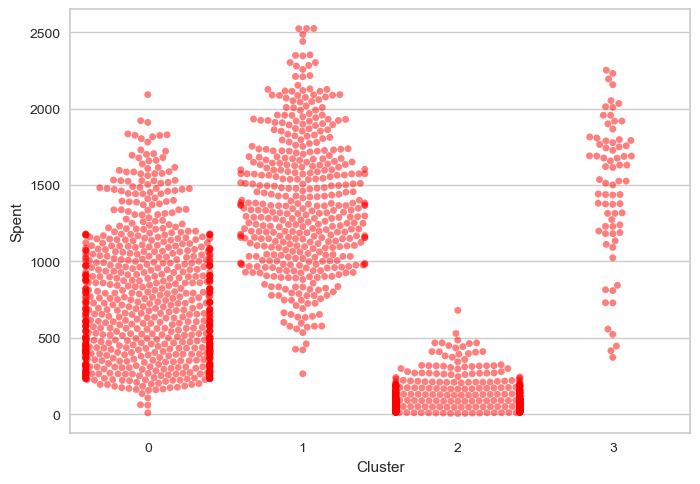

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


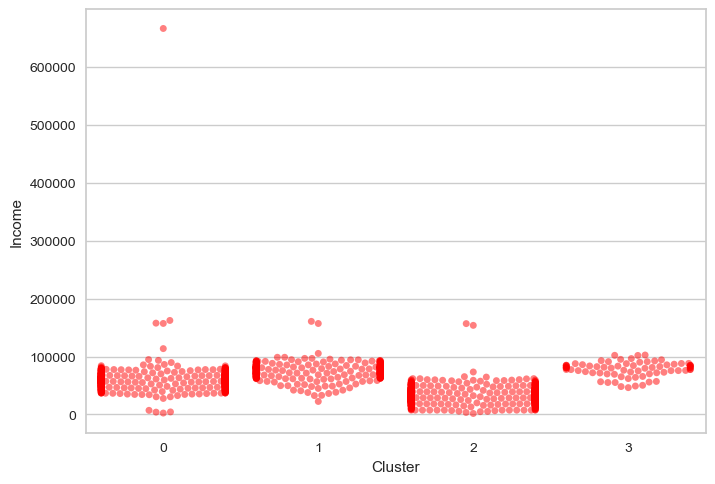

In [53]:
#Visualization using swarmplot
sns.swarmplot(x=df['Cluster'],y=df['Spent'], color= 'red',alpha=0.5)
plt.show()

sns.swarmplot(x=df['Cluster'],y=df['Income'], color= 'red',alpha=0.5)
plt.show()

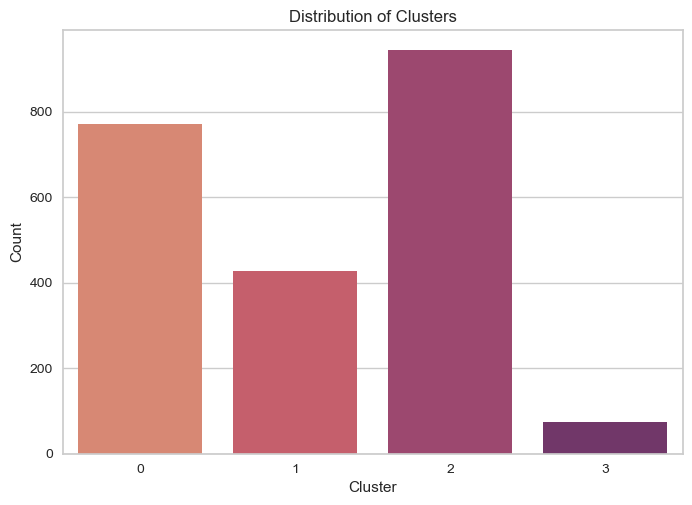

In [54]:
#Visualization of distribution of cluster chart
sns.countplot(x=df['Cluster'], palette='flare')
plt.title("Distribution of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

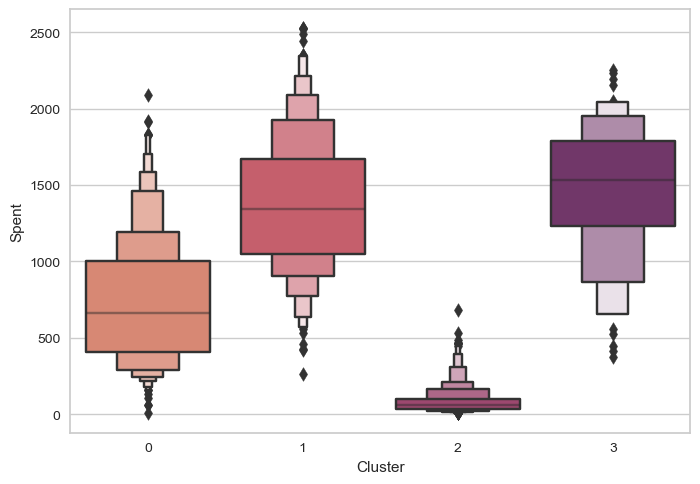

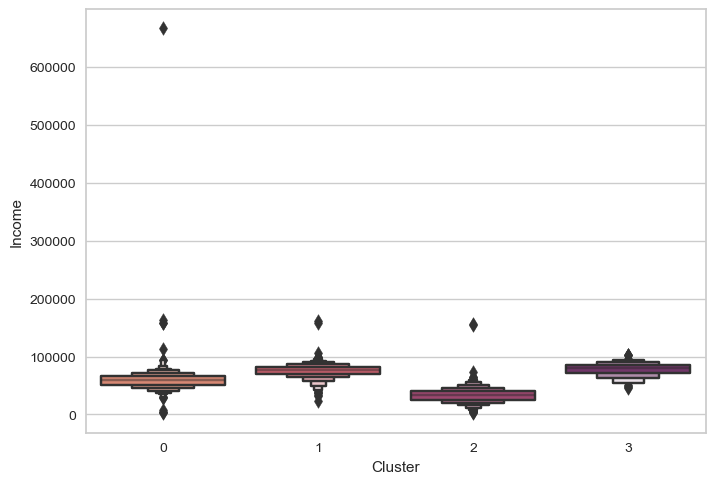

In [55]:
# Visualization using boxenplot
sns.boxenplot(x=df['Cluster'],y=df['Spent'], palette='flare')
plt.show()

sns.boxenplot(x=df['Cluster'],y=df['Income'], palette='flare')
plt.show()

<Figure size 800x550 with 0 Axes>

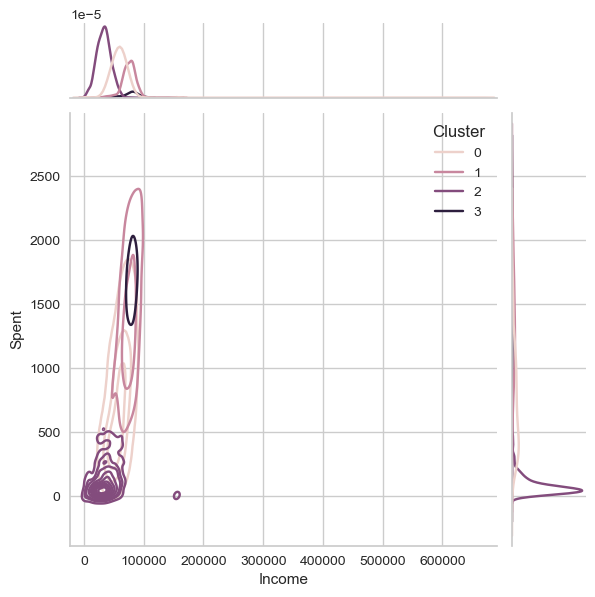

In [56]:
#Profiling using jointplot
plt.figure()
sns.jointplot(x=df['Income'],y=df['Spent'],hue=df['Cluster'],kind='kde')
plt.show()

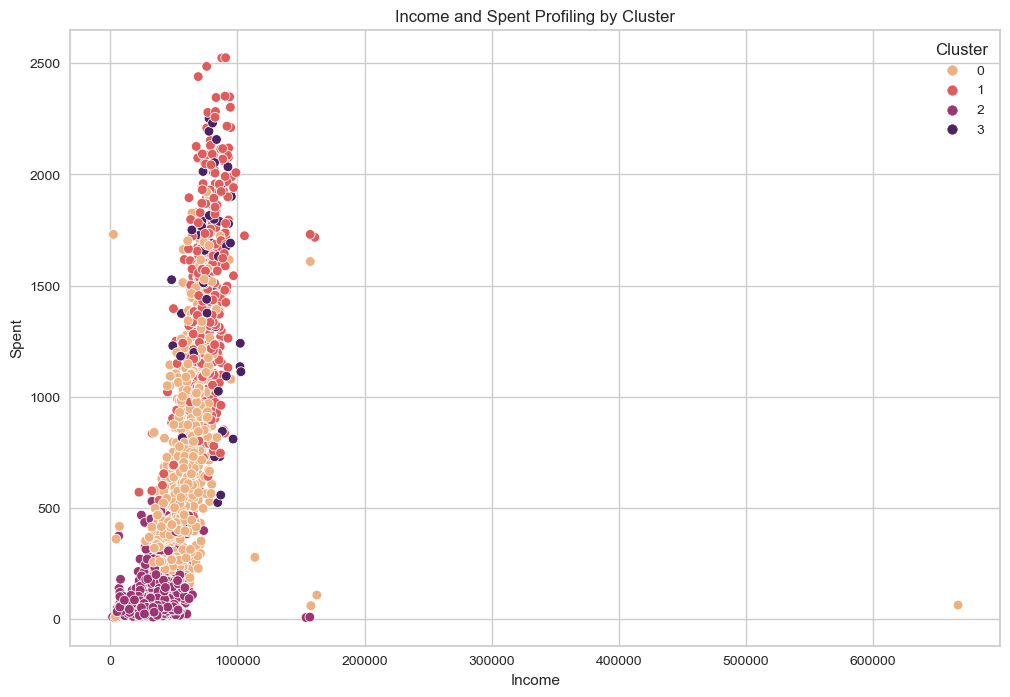

In [57]:
# Profiling using scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Income", y="Spent", data=df, hue="Cluster", palette='flare')
plt.title("Income and Spent Profiling by Cluster")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.grid(True)
plt.legend(title="Cluster", loc="best")
plt.show()